In [1]:
!pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus
!pip install plotly

  Cloning https://github.com/NHERI-SimCenter/BrailsPlusPlus to c:\users\simcenter\appdata\local\temp\pip-req-build-80y93l3t
  Resolved https://github.com/NHERI-SimCenter/BrailsPlusPlus to commit 73286b2ecc5378599ad466a4a2de0dd8b43c9e93
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/NHERI-SimCenter/BrailsPlusPlus 'C:\Users\SimCenter\AppData\Local\Temp\pip-req-build-80y93l3t'

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Written: sy Aug 2024
# License: BSD-2

"""
 Purpose: Testing Imputer
"""

import os
import sys
import copy
import json

import numpy as np

sys.path.insert(0, "../../")
from brails.utils import Importer
from brails.types.image_set import ImageSet    
from brails.types.asset_inventory import Asset, AssetInventory


### Loading data table from csv

In [3]:
file_path = "./example_Tiburon.csv"

In [4]:
# create an Import to get the classes

importer = Importer()
knn_imputer_class = importer.get_class("KnnImputer")

In [5]:
inventory = AssetInventory()
inventory.read_from_csv(file_path,keep_existing=True, id_column='index') 

No existing inventory found. Creating a new inventory


True

In [6]:
inventory.get_asset_features(4)[1]  # empty or 'NA' are missing values

{'index': 4,
 'erabuilt': 'NA',
 'numstories': 2,
 'roofshape': 'Hip',
 'fpAreas': 10802,
 'occupancy2': 'Residential',
 'fparea': '',
 'repaircost': '',
 'constype': '',
 'occupancy': '',
 'type': 'building'}

### Importing imputer and run imputation

In [8]:
imputer=knn_imputer_class(inventory,n_possible_worlds=10)
new_inventory = imputer.impute()

Missing percentages among 3249 assets
erabuilt: 14.19%
numstories: 13.82%
occupancy2: 3.42%
fparea: 14.19%
repaircost: 14.19%
constype: 14.19%
occupancy: 14.19%
Primitive imputation done.
Running the main imputation. This may take a while.
Done imputation. It took 0.05 mins


In [9]:
new_inventory.get_asset_features(4)[1]  # empty or 'NA' are missing values

{'index': 4,
 'erabuilt': 1975.0,
 'numstories': 2,
 'roofshape': 'Hip',
 'fpAreas': 10802,
 'occupancy2': 'Residential',
 'fparea': [4654.0,
  1784.0,
  4654.0,
  4654.0,
  2582.0,
  2582.0,
  4654.0,
  2582.0,
  2582.0,
  1784.0],
 'repaircost': [236440.24,
  419571.341,
  419571.341,
  236440.24,
  419571.341,
  236440.24,
  419571.341,
  322763.278,
  236440.24,
  425334.148],
 'constype': ['W1', 'W1', 'S1', 'S1', 'RM1', 'W1', 'S1', 'RM1', 'S1', 'RM1'],
 'occupancy': ['RES1',
  'RES1',
  'COM4',
  'RES1',
  'RES1',
  'RES3A',
  'RES1',
  'RES3A',
  'COM4',
  'COM4'],
 'type': 'building'}

### Inspecting the results

In [10]:
try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px

In [11]:
# Table for the original data
inventory_df, geom_df, nbldg = inventory.get_dataframe()
inventory_df.replace('', np.nan, inplace=True) # for visualization
inventory_df.replace('NA', np.nan, inplace=True) # for visualization

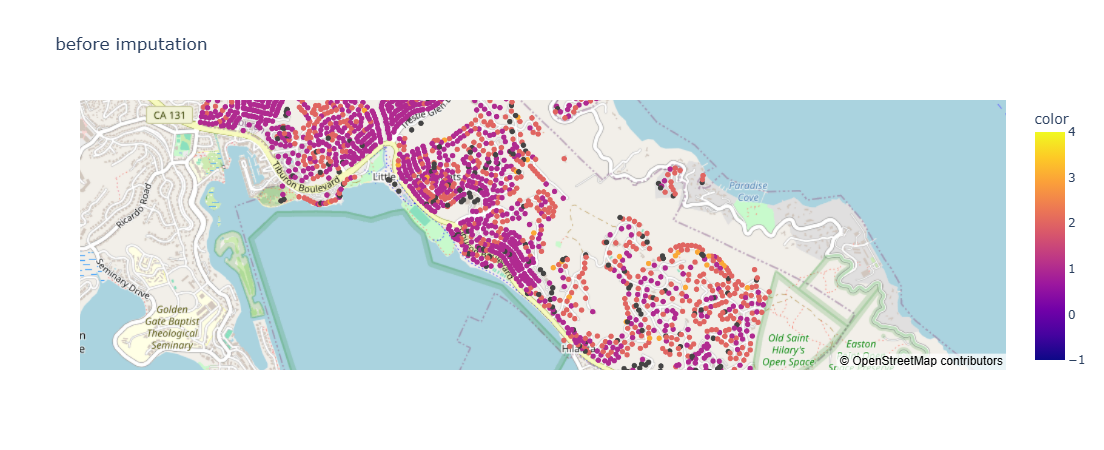

In [12]:

fig = px.scatter_mapbox(geom_df, lat="Lat", lon="Lon", color=(inventory_df["numstories"].astype(float)),range_color=[-1,4],zoom=13, mapbox_style='open-street-map',width=600, height=450,title='before imputation')
fig.show()

In [13]:
# Get realization 
new_inventory_re1=new_inventory.get_world_realization(1)
inventory_new_df, geom_new_df, nbldg = new_inventory_re1.get_dataframe()

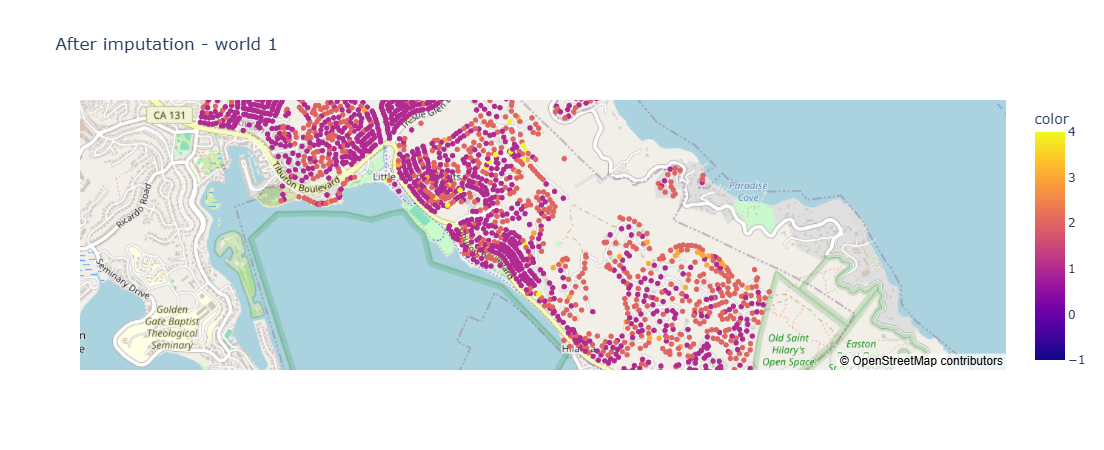

In [14]:
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["numstories"].astype(float),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',width=600, height=450,title='After imputation - world 1')
fig.show()

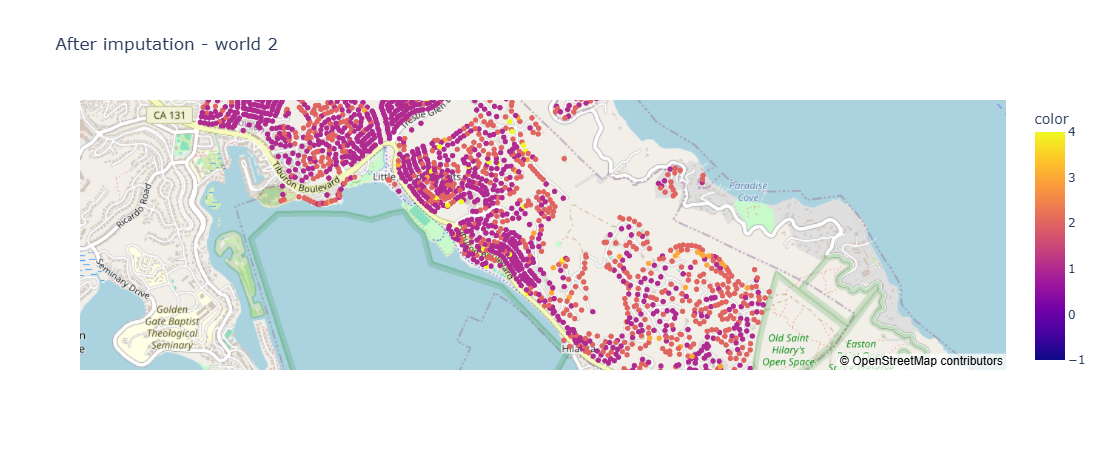

In [15]:
# Get realization 2
new_inventory_re2=new_inventory.get_world_realization(2)
inventory_new_df, geom_new_df, nbldg = new_inventory_re2.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["numstories"].astype(float),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',width=400*1.5, height=300*1.5,title='After imputation - world 2')
fig.show()